In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
df=pd.read_csv("train.csv")

In [2]:
# df.head()
df.shape

(31599, 15)

<Axes: >

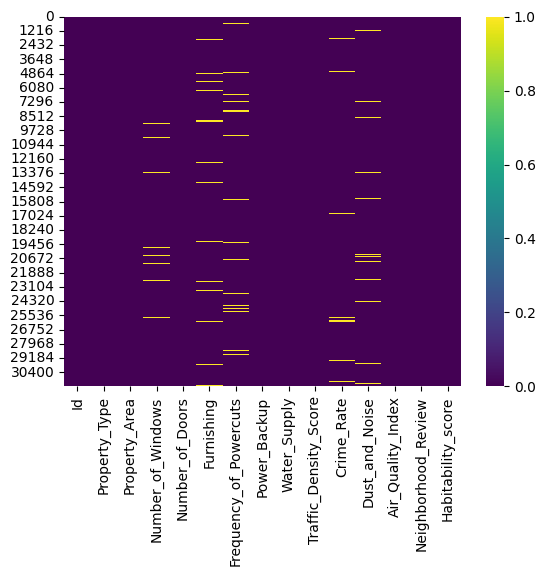

In [3]:
#to check the overview of the missing data used heat map to illustrate it 
sns.heatmap(df.isnull(),cmap="viridis",cbar="false")

In [4]:
#check how many null values are present in each column
df.isnull().sum()

Id                           0
Property_Type                0
Property_Area                0
Number_of_Windows         1333
Number_of_Doors              0
Furnishing                 828
Frequency_of_Powercuts    1109
Power_Backup                 0
Water_Supply                 0
Traffic_Density_Score        0
Crime_Rate                 629
Dust_and_Noise             999
Air_Quality_Index            0
Neighborhood_Review          0
Habitability_score           0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31599 entries, 0 to 31598
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Id                      31599 non-null  object 
 1   Property_Type           31599 non-null  object 
 2   Property_Area           31599 non-null  int64  
 3   Number_of_Windows       30266 non-null  float64
 4   Number_of_Doors         31599 non-null  int64  
 5   Furnishing              30771 non-null  object 
 6   Frequency_of_Powercuts  30490 non-null  float64
 7   Power_Backup            31599 non-null  object 
 8   Water_Supply            31599 non-null  object 
 9   Traffic_Density_Score   31599 non-null  float64
 10  Crime_Rate              30970 non-null  object 
 11  Dust_and_Noise          30600 non-null  object 
 12  Air_Quality_Index       31599 non-null  float64
 13  Neighborhood_Review     31599 non-null  float64
 14  Habitability_score      31599 non-null

In [6]:
#filling values for metric variable
df["Number_of_Windows"]=df["Number_of_Windows"].fillna(df["Number_of_Windows"].mean())
df["Frequency_of_Powercuts"]=df["Frequency_of_Powercuts"].fillna(df["Frequency_of_Powercuts"].mean())

In [7]:
#filling values for categorical variable
df["Furnishing"]=df["Furnishing"].fillna(df["Furnishing"].mode()[0])
df["Crime_Rate"]=df["Crime_Rate"].fillna(df["Crime_Rate"].mode()[0])
df["Dust_and_Noise"]=df["Dust_and_Noise"].fillna(df["Dust_and_Noise"].mode()[0])

In [8]:
#finding the unique values taken by each categorical variables
categ_variables=["Furnishing","Power_Backup","Water_Supply","Crime_Rate","Dust_and_Noise"]
for i in categ_variables:
    print(i,df[i].unique())

Furnishing ['Semi_Furnished' 'Unfurnished' 'Fully Furnished']
Power_Backup ['No' 'Yes' 'NOT MENTIONED']
Water_Supply ['Once in a day - Morning' 'Once in a day - Evening' 'All time'
 'NOT MENTIONED' 'Once in two days']
Crime_Rate ['Slightly below average' 'Well below average' 'Well above average'
 'Slightly above average']
Dust_and_Noise ['Medium' 'High' 'Low']


In [9]:
#onehotencoding on the nominal variable
df_propertytype=pd.get_dummies(df["Property_Type"],prefix='Property_Type_').astype(int)

df=df.drop(["Property_Type"],axis=1)
df = pd.concat([df, df_propertytype], axis=1)  # Along columns

In [10]:
df.head(20)

,Id,Property_Area,Number_of_Windows,Number_of_Doors,Furnishing,Frequency_of_Powercuts,Power_Backup,Water_Supply,Traffic_Density_Score,Crime_Rate,Dust_and_Noise,Air_Quality_Index,Neighborhood_Review,Habitability_score,Property_Type__#R%$G&867,Property_Type__Apartment,Property_Type__Bungalow,Property_Type__Container Home,Property_Type__Duplex,Property_Type__Single-family home
0,0x21e3,106,3.926254,1,Semi_Furnished,0.0,No,Once in a day - Morning,5.89,Slightly below average,Medium,90.0,3.86,71.98,0,1,0,0,0,0
1,0x68d4,733,2.000000,2,Unfurnished,1.0,No,Once in a day - Evening,4.37,Well below average,Medium,96.0,3.55,71.20,0,1,0,0,0,0
2,0x7d81,737,4.000000,2,Fully Furnished,0.0,No,Once in a day - Morning,7.45,Slightly below average,Medium,121.0,3.81,71.39,0,1,0,0,0,0
3,0x7a57,900,3.000000,2,Unfurnished,2.0,Yes,Once in a day - Morning,6.16,Well above average,Medium,100.0,1.34,31.46,0,1,0,0,0,0
4,0x9409,2238,14.000000,6,Fully Furnished,0.0,No,All time,5.46,Well below average,Medium,116.0,4.77,93.70,0,0,1,0,0,0
5,0xbe4e,1185,3.000000,3,Unfurnished,0.0,No,Once in a day - Morning,5.69,Well below average,Medium,91.0,4.49,82.94,0,0,0,0,0,1
6,0xe2a,1779,3.000000,3,Semi_Furnished,0.0,No,Once in a day - Evening,7.43,Well below average,Medium,100.0,2.90,74.88,0,0,0,0,0,1
7,0x2ea5,1281,5.000000,2,Semi_Furnished,3.0,No,All time,7.72,Well above average,Medium,143.0,0.96,28.54,0,0,0,0,1,0
8,0x7a83,268,1.000000,3,Semi_Furnished,1.0,No,All time,6.13,Well below average,Medium,94.0,4.17,88.11,0,1,0,0,0,0
9,0xb0fb,159,2.000000,2,Semi_Furnished,0.0,Yes,Once in a day - Morning,6.77,Well below average,Medium,90.0,4.48,80.65,0,1,0,0,0,0


In [11]:
#ordinal encoding for ordinal variables
from sklearn.preprocessing import OrdinalEncoder

#furnishing category
oe_furnish=OrdinalEncoder(categories=[['Unfurnished' ,'Semi_Furnished','Fully Furnished']])
df["Furnishing"]=oe_furnish.fit_transform(df[["Furnishing"]])

#Power_Backup
df["Power_Backup"]=df["Power_Backup"].replace('NOT MENTIONED','No')
oe_powerbackup = OrdinalEncoder(categories=[['No','Yes']])
df["Power_Backup"]=oe_powerbackup.fit_transform(df[["Power_Backup"]])

#Water_Supply
df['Water_Supply'] = df['Water_Supply'].replace('Once in a day - Evening', 'Once in a day - Morning')
df['Water_Supply'] = df['Water_Supply'].replace('NOT MENTIONED','Once in two days')
oe_watersupply=OrdinalEncoder(categories=[["Once in two days",'Once in a day - Morning','All time']])
df["Water_Supply"] = oe_watersupply.fit_transform(df[["Water_Supply"]])

#Crime_Rate
oe_crime = OrdinalEncoder(categories=[['Well below average','Slightly below average','Slightly above average', 'Well above average']])
df["Crime_Rate"]=oe_crime.fit_transform(df[["Crime_Rate"]])

#Dust_and_Noise
oe_dustnoise = OrdinalEncoder(categories=[['Low','Medium','High']])
df["Dust_and_Noise"]=oe_dustnoise.fit_transform(df[["Dust_and_Noise"]])

In [12]:
df.head(5)

,Id,Property_Area,Number_of_Windows,Number_of_Doors,Furnishing,Frequency_of_Powercuts,Power_Backup,Water_Supply,Traffic_Density_Score,Crime_Rate,Dust_and_Noise,Air_Quality_Index,Neighborhood_Review,Habitability_score,Property_Type__#R%$G&867,Property_Type__Apartment,Property_Type__Bungalow,Property_Type__Container Home,Property_Type__Duplex,Property_Type__Single-family home
0,0x21e3,106,3.926254,1,1.0,0.0,0.0,1.0,5.89,1.0,1.0,90.0,3.86,71.98,0,1,0,0,0,0
1,0x68d4,733,2.000000,2,0.0,1.0,0.0,1.0,4.37,0.0,1.0,96.0,3.55,71.20,0,1,0,0,0,0
2,0x7d81,737,4.000000,2,2.0,0.0,0.0,1.0,7.45,1.0,1.0,121.0,3.81,71.39,0,1,0,0,0,0
3,0x7a57,900,3.000000,2,0.0,2.0,1.0,1.0,6.16,3.0,1.0,100.0,1.34,31.46,0,1,0,0,0,0
4,0x9409,2238,14.000000,6,2.0,0.0,0.0,2.0,5.46,0.0,1.0,116.0,4.77,93.70,0,0,1,0,0,0


In [13]:
df_id=df.pop("Id")
df_id

0        0x21e3
1        0x68d4
2        0x7d81
3        0x7a57
4        0x9409
          ...  
31594    0x4dbe
31595    0x41b3
31596    0x8531
31597    0x2537
31598    0x89aa
Name: Id, Length: 31599, dtype: object

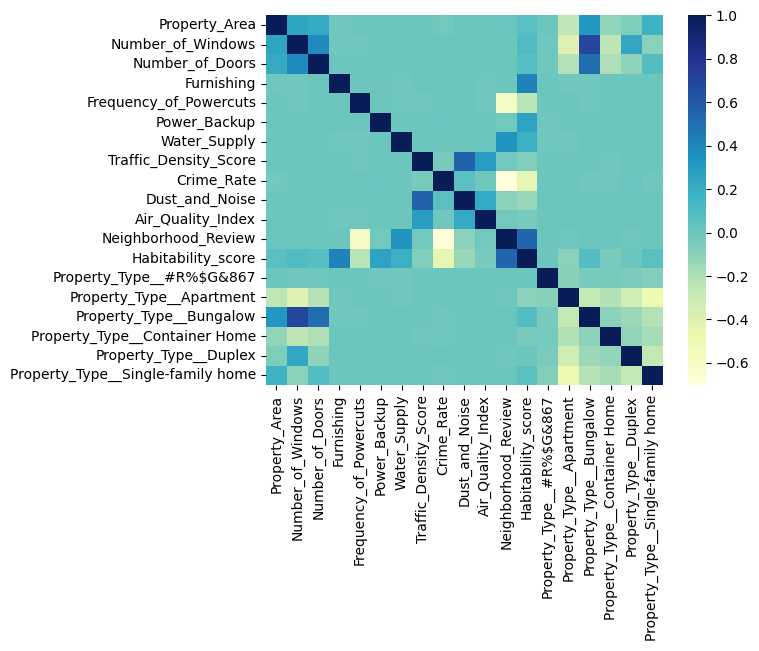

In [14]:
#to check any strong relationship between any attributes
sns.heatmap(df.corr(),cmap="YlGnBu")
plt.show()

In [15]:
df.head()

,Property_Area,Number_of_Windows,Number_of_Doors,Furnishing,Frequency_of_Powercuts,Power_Backup,Water_Supply,Traffic_Density_Score,Crime_Rate,Dust_and_Noise,Air_Quality_Index,Neighborhood_Review,Habitability_score,Property_Type__#R%$G&867,Property_Type__Apartment,Property_Type__Bungalow,Property_Type__Container Home,Property_Type__Duplex,Property_Type__Single-family home
0,106,3.926254,1,1.0,0.0,0.0,1.0,5.89,1.0,1.0,90.0,3.86,71.98,0,1,0,0,0,0
1,733,2.000000,2,0.0,1.0,0.0,1.0,4.37,0.0,1.0,96.0,3.55,71.20,0,1,0,0,0,0
2,737,4.000000,2,2.0,0.0,0.0,1.0,7.45,1.0,1.0,121.0,3.81,71.39,0,1,0,0,0,0
3,900,3.000000,2,0.0,2.0,1.0,1.0,6.16,3.0,1.0,100.0,1.34,31.46,0,1,0,0,0,0
4,2238,14.000000,6,2.0,0.0,0.0,2.0,5.46,0.0,1.0,116.0,4.77,93.70,0,0,1,0,0,0


In [16]:
df=pd.concat([df_id,df],axis="columns")

In [17]:
df.head(20)

,Id,Property_Area,Number_of_Windows,Number_of_Doors,Furnishing,Frequency_of_Powercuts,Power_Backup,Water_Supply,Traffic_Density_Score,Crime_Rate,Dust_and_Noise,Air_Quality_Index,Neighborhood_Review,Habitability_score,Property_Type__#R%$G&867,Property_Type__Apartment,Property_Type__Bungalow,Property_Type__Container Home,Property_Type__Duplex,Property_Type__Single-family home
0,0x21e3,106,3.926254,1,1.0,0.0,0.0,1.0,5.89,1.0,1.0,90.0,3.86,71.98,0,1,0,0,0,0
1,0x68d4,733,2.000000,2,0.0,1.0,0.0,1.0,4.37,0.0,1.0,96.0,3.55,71.20,0,1,0,0,0,0
2,0x7d81,737,4.000000,2,2.0,0.0,0.0,1.0,7.45,1.0,1.0,121.0,3.81,71.39,0,1,0,0,0,0
3,0x7a57,900,3.000000,2,0.0,2.0,1.0,1.0,6.16,3.0,1.0,100.0,1.34,31.46,0,1,0,0,0,0
4,0x9409,2238,14.000000,6,2.0,0.0,0.0,2.0,5.46,0.0,1.0,116.0,4.77,93.70,0,0,1,0,0,0
5,0xbe4e,1185,3.000000,3,0.0,0.0,0.0,1.0,5.69,0.0,1.0,91.0,4.49,82.94,0,0,0,0,0,1
6,0xe2a,1779,3.000000,3,1.0,0.0,0.0,1.0,7.43,0.0,1.0,100.0,2.90,74.88,0,0,0,0,0,1
7,0x2ea5,1281,5.000000,2,1.0,3.0,0.0,2.0,7.72,3.0,1.0,143.0,0.96,28.54,0,0,0,0,1,0
8,0x7a83,268,1.000000,3,1.0,1.0,0.0,2.0,6.13,0.0,1.0,94.0,4.17,88.11,0,1,0,0,0,0
9,0xb0fb,159,2.000000,2,1.0,0.0,1.0,1.0,6.77,0.0,1.0,90.0,4.48,80.65,0,1,0,0,0,0


In [18]:
df.to_csv('traindata_preprocessed.csv', index=False)